In [10]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
target_accounts = ("@BBC", "@CNN","@CBS","@FoxNews","@nytimes")



sentiment_list=[]

In [12]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
date= []
sentiment_table= []
news_outlet=[]
tweets=[]
index=[]
   
for target in target_accounts:
    counter=0
    
    account_tweets = api.user_timeline(target, count=100, result_type="recent" )
     
    for tweet in account_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        date=tweet["created_at"]
        
            
            
        counter += 1
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        news_outlet.append(target)
        tweets.append(tweet["text"])
        index.append(counter)
        
    
    
    
        sentiment = {
            "News Account": target,
            "Compound": np.mean(compound_list),
            "Positive": np.mean(positive_list),
            "Neutral": np.mean(negative_list),
            "Negative": np.mean(neutral_list)}
    
    
    
        
        #sentiment_table.append({"New Outlet":target,
                            #"Tweet Text":tweet["text"],
                            #"Date": tweet["created_at"], 
                            #"Compound": compound,
                            #"Positive": pos,
                            #"Negative": neu,
                            #"Neutral": neg,
                            #"Tweets Ago": counter})
    sentiment_list.append(sentiment)             
#sentiments_pd=pd.DataFrame.from_dict(sentiment_table)
        

In [13]:
sentiments_pd=pd.DataFrame(news_outlet, columns=["New Outlet"])
sentiments_pd["Date"]=date
sentiments_pd["Tweet Text"]=tweets
sentiments_pd["Compound"]=compound_list
sentiments_pd["Positive"]=positive_list
sentiments_pd["Negative"]=negative_list
sentiments_pd["Tweets Ago"]=index
sentiments_pd["Neutral"]=neutral_list




In [14]:
news_df = pd.DataFrame(sentiment_list).set_index("News Account").round(3)
news_df

,Compound,Negative,Neutral,Positive
News Account,,,,
@BBC,0.173,0.851,0.044,0.105
@CNN,0.081,0.858,0.056,0.086
@CBS,0.164,0.839,0.042,0.119
@FoxNews,0.139,0.843,0.047,0.110
@nytimes,0.121,0.845,0.050,0.104


In [15]:
sentiments_pd=sentiments_pd[["Date","New Outlet","Tweet Text","Positive","Neutral","Negative","Compound","Tweets Ago"]]
sentiments_pd


,Date,New Outlet,Tweet Text,Positive,Neutral,Negative,Compound,Tweets Ago
0,Fri Jul 13 20:33:07 +0000 2018,@BBC,"Tonight, @reginalddhunter takes a 2,000-mile m...",0.000,1.000,0.000,0.0000,1
1,Fri Jul 13 20:33:07 +0000 2018,@BBC,There's a clear difference in the way boys and...,0.157,0.843,0.000,0.3818,2
2,Fri Jul 13 20:33:07 +0000 2018,@BBC,🎾 Angelique Kerber beat seven-time champion Se...,0.391,0.609,0.000,0.8271,3
3,Fri Jul 13 20:33:07 +0000 2018,@BBC,RT @BBCSport: Angelique Kerber is the #wimbled...,0.176,0.824,0.000,0.6688,4
4,Fri Jul 13 20:33:07 +0000 2018,@BBC,"""We'll definitely keep in touch!"" 👋 *Immediat...",0.232,0.621,0.147,0.2714,5
5,Fri Jul 13 20:33:07 +0000 2018,@BBC,A wild banana that may hold the key to protect...,0.000,1.000,0.000,0.0000,6
6,Fri Jul 13 20:33:07 +0000 2018,@BBC,There she goes! 🚢 🌊\n\nThe RRS Sir David Atten...,0.000,1.000,0.000,0.0000,7
7,Fri Jul 13 20:33:07 +0000 2018,@BBC,RT @bbctennis: Meghan Markle has arrived!\n\nT...,0.000,1.000,0.000,0.0000,8
8,Fri Jul 13 20:33:07 +0000 2018,@BBC,We all know a hipster restaurant that's taken ...,0.000,1.000,0.000,0.0000,9
9,Fri Jul 13 20:33:07 +0000 2018,@BBC,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,0.000,1.000,0.000,0.0000,10


In [16]:
sentiments_pd.to_csv("News_outlets_sentiment_analysis.csv",encoding="utf-8",index=False)

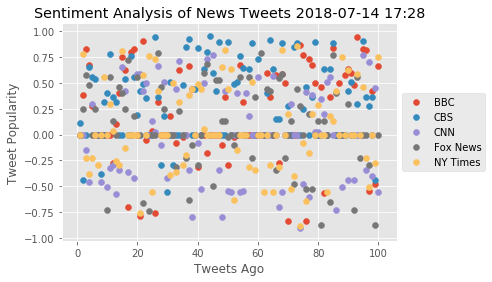

In [17]:

bbc_pd = sentiments_pd.loc[sentiments_pd['New Outlet'] == '@BBC']
plt.scatter(bbc_pd['Tweets Ago'], bbc_pd['Compound'], label='BBC')

cbs_pd = sentiments_pd.loc[sentiments_pd['New Outlet'] == '@CBS']
plt.scatter(cbs_pd['Tweets Ago'], cbs_pd['Compound'], label='CBS')

cnn_pd = sentiments_pd.loc[sentiments_pd['New Outlet'] == '@CNN']
plt.scatter(cnn_pd['Tweets Ago'], cnn_pd['Compound'], label='CNN')

foxnews_pd = sentiments_pd.loc[sentiments_pd['New Outlet'] == '@FoxNews']
plt.scatter(foxnews_pd['Tweets Ago'], foxnews_pd['Compound'], label='Fox News')

nytimes_pd = sentiments_pd.loc[sentiments_pd['New Outlet'] == '@nytimes']
plt.scatter(nytimes_pd['Tweets Ago'], nytimes_pd['Compound'], label='NY Times')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f'Sentiment Analysis of News Tweets {now}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('News_Analysis.png')
plt.show()

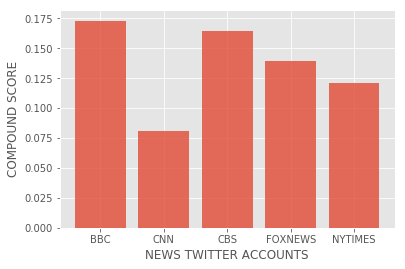

<Figure size 432x288 with 0 Axes>

In [23]:

x_vals = ["BBC","CNN","CBS","FOXNEWS","NYTIMES"]
y_vals = news_df["Compound"]
plt.bar(x_vals,
        y_vals,alpha=0.8)
plt.xlabel("NEWS TWITTER ACCOUNTS")
plt.ylabel("COMPOUND SCORE")
plt.show()
plt.savefig("news_Bar_graph.png")